In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='69_0BF7C7i0PwAva39vflbHemCMFrp8nGcadZcblok4y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'nsapeligibilityprediction-donotdelete-pr-f65sqc2h8s3goq'
object_key = 'nsapallschemes-1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)


,finyear,lgdstatecode,statename,lgddistrictcode,districtname,schemecode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
0,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNDPS,108,72,36,0,0,3,104,1,108,69
1,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNOAPS,8438,5059,3379,0,37,235,8083,83,8371,7190
2,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNWPS,202,0,202,0,1,15,180,6,200,159
3,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNDPS,310,211,99,0,0,77,200,33,234,110
4,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,5958,3958,2000,0,2,1347,4367,242,3875,2287
5,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNWPS,382,0,382,0,0,65,298,19,260,90
6,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNDPS,95,63,32,0,0,6,81,8,94,93
7,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNOAPS,5021,2911,2110,0,1,197,4443,380,5021,4935
8,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNWPS,304,0,304,0,0,20,260,24,304,258
9,2025-2026,1,JAMMU AND KASHMIR,12,RAJAURI,IGNDPS,78,52,26,0,5,5,68,0,72,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   finyear             2156 non-null   object
 1   lgdstatecode        2156 non-null   int64 
 2   statename           2156 non-null   object
 3   lgddistrictcode     2156 non-null   int64 
 4   districtname        2156 non-null   object
 5   schemecode          2156 non-null   object
 6   totalbeneficiaries  2156 non-null   int64 
 7   totalmale           2156 non-null   int64 
 8   totalfemale         2156 non-null   int64 
 9   totaltransgender    2156 non-null   int64 
 10  totalsc             2156 non-null   int64 
 11  totalst             2156 non-null   int64 
 12  totalgen            2156 non-null   int64 
 13  totalobc            2156 non-null   int64 
 14  totalaadhaar        2156 non-null   int64 
 15  totalmobilenumber   2156 non-null   int64 
dtypes: int64(12), object(4)


In [7]:
df.describe()

,lgdstatecode,lgddistrictcode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,18.085807,366.853432,13864.290353,5518.308442,8344.925325,0.926716,2370.432282,1387.965213,5766.059369,4334.096011,12084.051948,9853.239332
std,9.770668,211.760095,22855.917172,11926.748715,12518.941254,6.692879,4760.239674,3850.474062,13814.145206,8513.111659,20514.175808,18277.289930
min,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,185.000000,961.750000,0.000000,418.750000,0.000000,55.000000,12.000000,223.000000,54.000000,689.500000,466.750000
50%,19.000000,365.000000,4702.500000,503.000000,3415.000000,0.000000,481.000000,139.000000,1221.000000,692.500000,3199.500000,2419.500000
75%,24.000000,546.250000,17377.000000,4819.500000,11514.750000,0.000000,2432.750000,992.250000,5186.000000,4379.500000,14402.000000,10800.250000
max,38.000000,763.000000,278410.000000,130524.000000,147780.000000,165.000000,61247.000000,56759.000000,210999.000000,94046.000000,193015.000000,193091.000000


In [8]:
df['schemecode'].value_counts()

schemecode
IGNOAPS    731
IGNWPS     723
IGNDPS     702
Name: count, dtype: int64

In [9]:
df['statename'].value_counts()

statename
UTTAR PRADESH                                   216
MADHYA PRADESH                                  153
BIHAR                                           114
MAHARASHTRA                                     102
CHHATTISGARH                                     99
ASSAM                                            99
GUJARAT                                          99
TELANGANA                                        99
RAJASTHAN                                        99
TAMIL NADU                                       96
ODISHA                                           90
KARNATAKA                                        90
ARUNACHAL PRADESH                                75
JHARKHAND                                        72
WEST BENGAL                                      68
PUNJAB                                           66
HARYANA                                          66
ANDHRA PRADESH                                   63
JAMMU AND KASHMIR                                60
KE

In [10]:
df.isnull().sum()


finyear               0
lgdstatecode          0
statename             0
lgddistrictcode       0
districtname          0
schemecode            0
totalbeneficiaries    0
totalmale             0
totalfemale           0
totaltransgender      0
totalsc               0
totalst               0
totalgen              0
totalobc              0
totalaadhaar          0
totalmobilenumber     0
dtype: int64

In [46]:
grouping_cols = ['finyear', 'statename', 'districtname']

In [48]:
df_clean = df.dropna(subset=['totalbeneficiaries']).copy()

In [47]:
idx = df_clean.groupby(grouping_cols)['totalbeneficiaries'].idxmax()

In [14]:
df_clean.groupby(grouping_cols)

In [15]:
predominant_schemes_df = df_clean.loc[idx].copy()

In [16]:
predominant_schemes_df.rename(columns={'schemecode': 'predominant_scheme'}, inplace=True)

In [49]:
ml_df = predominant_schemes_df[
    ['finyear', 'statename', 'districtname',
     'totalbeneficiaries', 'totalmale', 'totalfemale', 'totalsc', 'totalst',
     'predominant_scheme']
].copy()

In [18]:
print("\n--- Data for Machine Learning (after finding predominant schemes) ---")
print(ml_df.head())
print("\nShape of ML dataset:", ml_df.shape)
print("\nDistribution of Predominant Schemes:")
print(ml_df['predominant_scheme'].value_counts())


--- Data for Machine Learning (after finding predominant schemes) ---
        finyear            statename              districtname  \
1601  2025-2026  ANDAMAN AND NICOBAR  NORTH AND MIDDLE ANDAMAN   
1599  2025-2026  ANDAMAN AND NICOBAR            SOUTH ANDAMANS   
1230  2025-2026       ANDHRA PRADESH                 ANANTAPUR   
1272  2025-2026       ANDHRA PRADESH     Alluri Sitharama Raju   
1270  2025-2026       ANDHRA PRADESH                Anakapalli   

      totalbeneficiaries  totalmale  totalfemale  totalsc  totalst  \
1601                 141         81           60        0        0   
1599                 444        266          178        0        0   
1230              118743      61290        57453    14299     3802   
1272               14214       8993         5221      362      503   
1270               19299      11277         8022     2200      871   

     predominant_scheme  
1601            IGNOAPS  
1599            IGNOAPS  
1230            IGNOAPS  
1272   

In [50]:
ml_df['finyear'] = ml_df['finyear'].apply(lambda x: int(x.split('-')[0]))

In [51]:
print("\n--- Data for Machine Learning (after finding predominant schemes and converting finyear) ---")
print(ml_df.head())
print("\nShape of ML dataset:", ml_df.shape)
print("\nDistribution of Predominant Schemes:")
print(ml_df['predominant_scheme'].value_counts())


--- Data for Machine Learning (after finding predominant schemes and converting finyear) ---
      finyear            statename              districtname  \
1601     2025  ANDAMAN AND NICOBAR  NORTH AND MIDDLE ANDAMAN   
1599     2025  ANDAMAN AND NICOBAR            SOUTH ANDAMANS   
1230     2025       ANDHRA PRADESH                 ANANTAPUR   
1272     2025       ANDHRA PRADESH     Alluri Sitharama Raju   
1270     2025       ANDHRA PRADESH                Anakapalli   

      totalbeneficiaries  totalmale  totalfemale  totalsc  totalst  \
1601                 141         81           60        0        0   
1599                 444        266          178        0        0   
1230              118743      61290        57453    14299     3802   
1272               14214       8993         5221      362      503   
1270               19299      11277         8022     2200      871   

     predominant_scheme  
1601            IGNOAPS  
1599            IGNOAPS  
1230            IGNOAP

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [53]:
label_encoder = LabelEncoder()
ml_df['predominant_scheme_encoded'] = label_encoder.fit_transform(ml_df['predominant_scheme'])

print(f"\nOriginal Predominant Scheme values and their encoded numerical labels:")
for i, scheme in enumerate(label_encoder.classes_):
    print(f"{scheme}: {i}")


Original Predominant Scheme values and their encoded numerical labels:
IGNOAPS: 0
IGNWPS: 1


In [54]:
TARGET_COLUMN_ENCODED = 'predominant_scheme_encoded'
X = ml_df.drop(['predominant_scheme', TARGET_COLUMN_ENCODED], axis=1) # Drop original and encoded target
y = ml_df[TARGET_COLUMN_ENCODED]

print("\nFeatures (X) head after selection:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())


Features (X) head after selection:
      finyear            statename              districtname  \
1601     2025  ANDAMAN AND NICOBAR  NORTH AND MIDDLE ANDAMAN   
1599     2025  ANDAMAN AND NICOBAR            SOUTH ANDAMANS   
1230     2025       ANDHRA PRADESH                 ANANTAPUR   
1272     2025       ANDHRA PRADESH     Alluri Sitharama Raju   
1270     2025       ANDHRA PRADESH                Anakapalli   

      totalbeneficiaries  totalmale  totalfemale  totalsc  totalst  
1601                 141         81           60        0        0  
1599                 444        266          178        0        0  
1230              118743      61290        57453    14299     3802  
1272               14214       8993         5221      362      503  
1270               19299      11277         8022     2200      871  

Target (y) head:
1601    0
1599    0
1230    0
1272    0
1270    0
Name: predominant_scheme_encoded, dtype: int64


In [55]:
categorical_features = ['statename', 'districtname']
numerical_features = ['finyear', 'totalbeneficiaries', 'totalmale', 'totalfemale', 'totalsc', 'totalst']

In [56]:
from sklearn.compose import ColumnTransformer

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features), # Keep numerical features as they are
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # One-hot encode categorical features
    ])

In [58]:
handle_unknown='ignore'

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 584 rows
Testing set size: 147 rows


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 

In [62]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))])                         

In [63]:
print("\nTraining the model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete!")


Training the model...
Model training complete!


In [64]:
print("\n--- Model Evaluation ---")
y_pred = model_pipeline.predict(X_test)


--- Model Evaluation ---


In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")

Model Accuracy on Test Set: 0.99


In [68]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

     IGNOAPS       0.99      1.00      1.00       144
      IGNWPS       1.00      0.67      0.80         3

    accuracy                           0.99       147
   macro avg       1.00      0.83      0.90       147
weighted avg       0.99      0.99      0.99       147



In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
cm = confusion_matrix(y_test, y_pred)

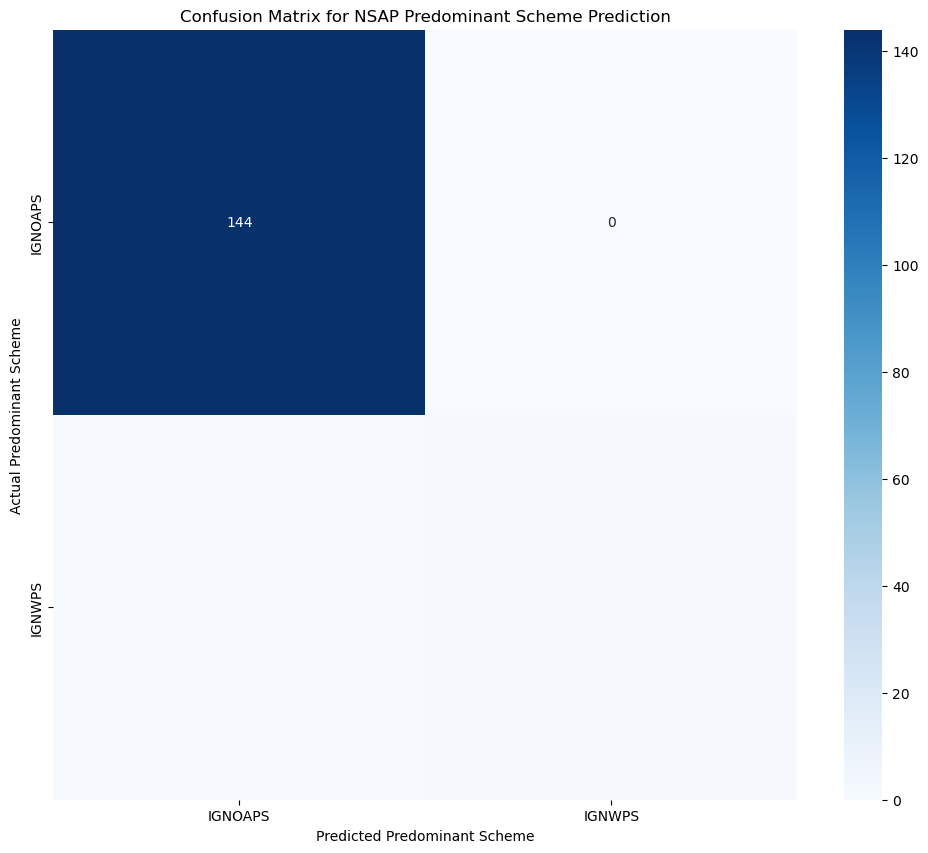

In [77]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Predominant Scheme')
plt.ylabel('Actual Predominant Scheme')
plt.title('Confusion Matrix for NSAP Predominant Scheme Prediction')
plt.show()

In [78]:
import joblib

In [79]:
model_filename = 'nsap_predominant_scheme_pipeline.joblib'
joblib.dump(model_pipeline, model_filename)
print(f"\nModel pipeline saved as '{model_filename}'")


Model pipeline saved as 'nsap_predominant_scheme_pipeline.joblib'


In [80]:
label_encoder_filename = 'nsap_predominant_scheme_label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label Encoder saved as '{label_encoder_filename}'")

Label Encoder saved as 'nsap_predominant_scheme_label_encoder.joblib'


In [81]:
print("\n--- Trying Logistic Regression Model ---")


--- Trying Logistic Regression Model ---


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'))])


In [87]:
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model training complete!")

Training Logistic Regression model...
Logistic Regression model training complete!


In [88]:
y_pred_lr = lr_pipeline.predict(X_test)

In [89]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Model Accuracy on Test Set: {accuracy_lr:.2f}")


Logistic Regression Model Accuracy on Test Set: 0.99


In [90]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

     IGNOAPS       1.00      0.99      1.00       144
      IGNWPS       0.75      1.00      0.86         3

    accuracy                           0.99       147
   macro avg       0.88      1.00      0.93       147
weighted avg       0.99      0.99      0.99       147



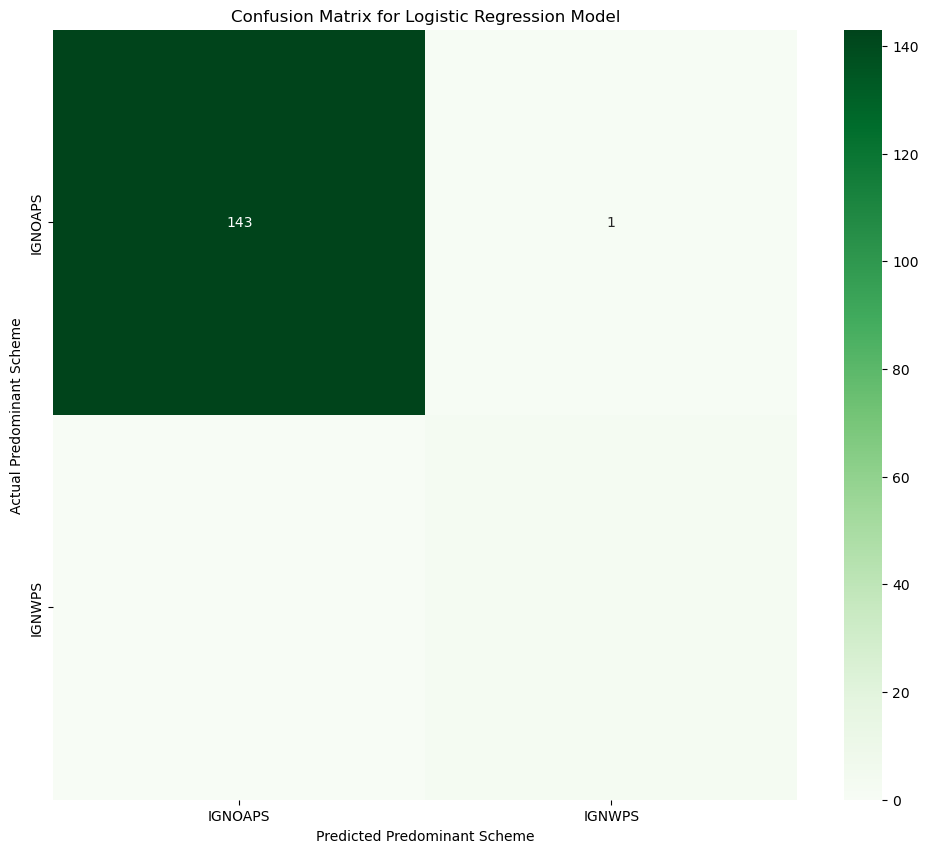

In [91]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Predominant Scheme')
plt.ylabel('Actual Predominant Scheme')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [92]:
print("\n--- Comparison ---")
print(f"Random Forest Accuracy: {accuracy:.2f}") # 'accuracy' from original RF model
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")



--- Comparison ---
Random Forest Accuracy: 0.99
Logistic Regression Accuracy: 0.99


In [ ]:
print("\n--- Feature Importance from RandomForestClassifier ---")


In [94]:
rf_classifier = model_pipeline.named_steps['classifier']

In [95]:
importances = rf_classifier.feature_importances_

In [96]:
feature_names_transformed = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

In [98]:
feature_importance_df = pd.DataFrame({'feature': feature_names_transformed, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df.head(10))

                        feature  importance
2                num__totalmale    0.329523
3              num__totalfemale    0.067258
1       num__totalbeneficiaries    0.053751
4                  num__totalsc    0.053248
5                  num__totalst    0.043124
20        cat__statename_KERALA    0.042629
616    cat__districtname_YADGIR    0.038326
568     cat__districtname_THENI    0.033482
325   cat__districtname_KOLKATA    0.027388
268  cat__districtname_JAMNAGAR    0.026433


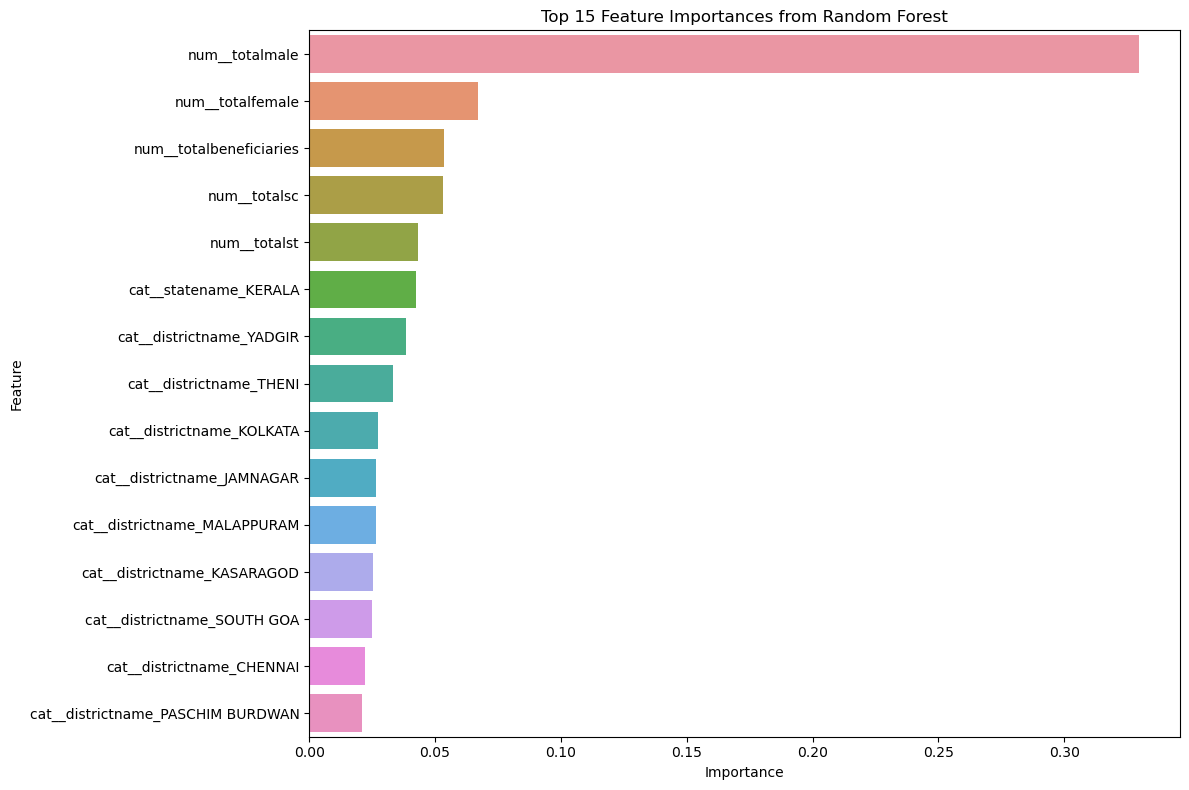

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [101]:
print("\n--- Performing GridSearchCV for Logistic Regression ---")



--- Performing GridSearchCV for Logistic Regression ---


In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [106]:
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__solver': ['liblinear', 'saga']}

In [107]:
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

print("Starting grid search (this may take some time)...")
grid_search.fit(X_train, y_train)

Starting grid search (this may take some time)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/Python-RT24.1/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['finyear',
                                                                          'totalbeneficiaries',
                                                                          'totalmale',
                                                                          'totalfemale',
                                                                          'totalsc',
                                                                          'totalst']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['statename',
                                                                          'districtname'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [108]:
print("\nGrid Search complete!")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")


Grid Search complete!
Best parameters found: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best cross-validation accuracy: 1.00


In [109]:
best_lr_model = grid_search.best_estimator_


In [110]:
y_pred_best_lr = best_lr_model.predict(X_test)
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"\nBest Logistic Regression Model Accuracy on Test Set (after tuning): {accuracy_best_lr:.2f}")


Best Logistic Regression Model Accuracy on Test Set (after tuning): 0.99


In [111]:
print("\nClassification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred_best_lr, target_names=label_encoder.classes_))


Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

     IGNOAPS       1.00      0.99      1.00       144
      IGNWPS       0.75      1.00      0.86         3

    accuracy                           0.99       147
   macro avg       0.88      1.00      0.93       147
weighted avg       0.99      0.99      0.99       147

